<a href="https://colab.research.google.com/github/rameshc70707/EDA/blob/main/module_7_modelevaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Types of regression
Simple linear regression
* Linear regression, which is also called simple linear regression, defines the relationship between two variables using a straight line.
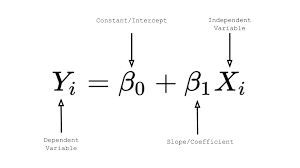

Multiple linear regression
* In the case of multiple linear regression, two more independent variables or explanatory variables show a linear relationship with the target or dependent variables.

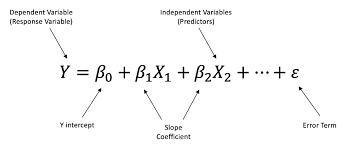

##Constructing a linear regression model

In [ ]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
sns.set(style="ticks", color_codes=True)
plt.rcParams['figure.figsize'] = (8,5)
plt.rcParams['figure.dpi'] = 150

In [ ]:
# loading the data
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/refs/heads/master/BostonHousing.csv")

In [ ]:
#Now, we have the dataset loaded into the boston variable. We can look at the keys of the dataframe as follows:
print(df.keys())

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')


In [ ]:
#Now that our data is loaded, let's get our DataFrame ready quickly and work ahead:
df.head()
# print the columns present in the dataset
print(df.columns)
# print the top 5 rows in the dataset
print(df.head())

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')
      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


In [ ]:
#In the new overall dataframe, let's check if we have any missing values:
df.isna().sum()

,0
crim,0
zn,0
indus,0
chas,0
nox,0
rm,0
age,0
dis,0
rad,0
tax,0


<Axes: >

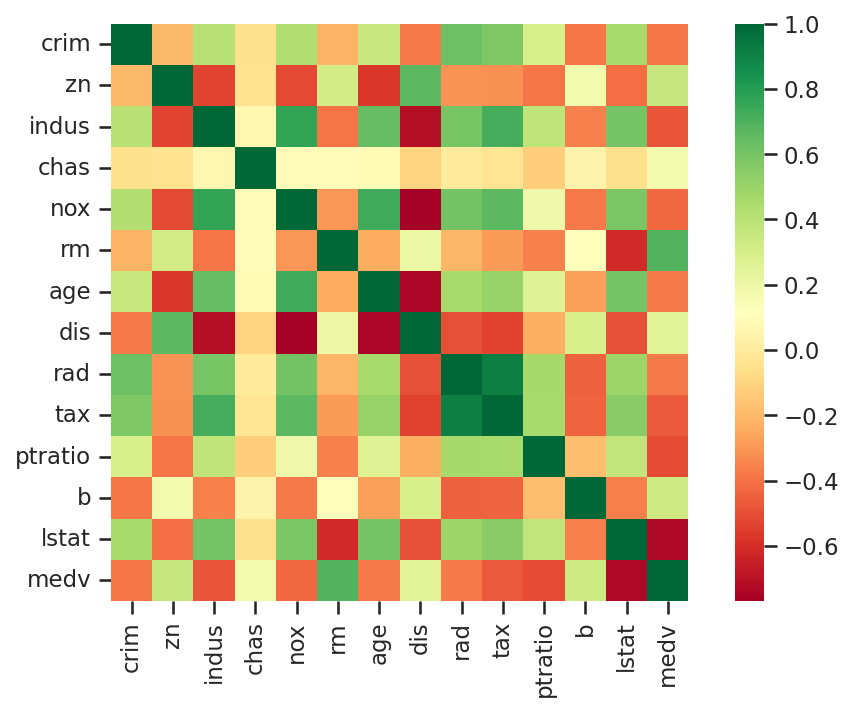

In [ ]:
#plotting heatmap for overall data set
sns.heatmap(df.corr(), square=True, cmap='RdYlGn')

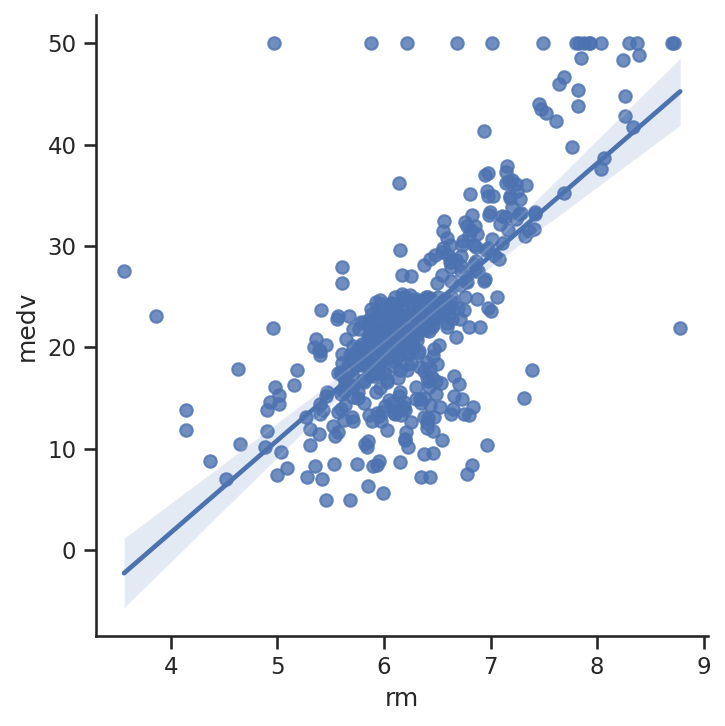

In [ ]:
#We can use the lmplot 6. method from seaborn to see the relationship between RM and MEDV. Check out the following snippet:
sns.lmplot(x = 'rm', y = 'medv', data = df)

In [ ]:
#Scikit-learn needs to create features and target variables in arrays, so be careful when assigning columns to X and y:
# Preparing the data
X = df[['rm']]
y = df[['medv']]

In [ ]:
# Splitting the dataset into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10)

In [ ]:
#Now the final step is training the linear regression model. From the extremely powerful sklearn library, we import the LinearRegression() function to fit
#our training dataset to the model. When we run LinearRegression().fit(), the function automatically calculates the OLS, which we discussed earlier, and
#generates an appropriate line function:
#Training a Linear Regression Model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
# Fitting the training data to our model
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
#Model evaluation
#R^2 can be determined using our test dataset in the LinearRegression.score() method:
#check prediction score/accuracy
regressor.score(X_test, y_test)

0.5383003344910231

In [ ]:
#Before that, let's predict the y values with our model and evaluate it more. And a target variables DataFrame is also built:
# predict the y values
y_pred=regressor.predict(X_test)
# a data frame with actual and predicted values of y
evaluate = pd.DataFrame({'Actual': y_test.values.flatten(),
'Predicted': y_pred.flatten()})
evaluate.head(10)

,Actual,Predicted
0,28.4,25.153909
1,31.1,26.773693
2,23.5,22.284072
3,26.6,27.997335
4,19.6,14.484456
5,14.3,23.569336
6,50.0,32.839084
7,14.3,16.535597
8,20.7,19.026896
9,37.6,37.689635


<Axes: >

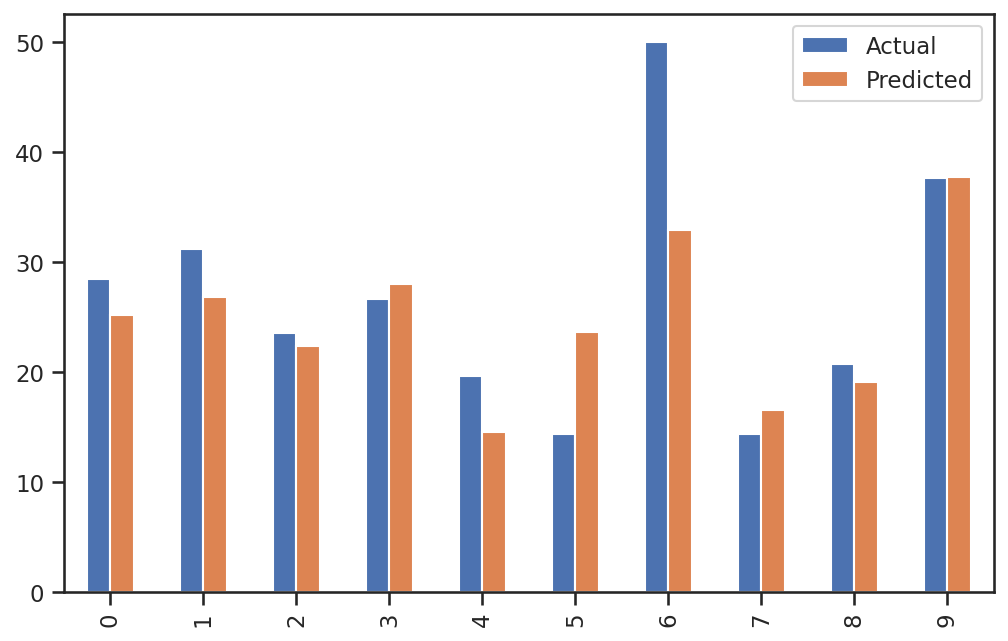

In [ ]:
#The preceding screenshot shows the difference between the actual values and the predicted values. We can see them if we plot them:
evaluate.head(10).plot(kind = 'bar')

In [ ]:
#Computing accuracy
# Scoring the model
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
# R2 Score
print(f"R2 score: {r2_score(y_test, y_pred)}")
# Mean Absolute Error (MAE)
print(f"MAE score: {mean_absolute_error(y_test, y_pred)}")
# Mean Squared Error (MSE)
print(f"MSE score: {mean_squared_error(y_test, y_pred)}")

R2 score: 0.5383003344910231
MAE score: 4.750294229575126
MSE score: 45.07733942471831
